In [57]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))\

import pandas as pd
import numpy as np
import GPy
import seaborn as sns
    
from matplotlib import pyplot as plt

%matplotlib inline

In [58]:
np.linspace(0,10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [59]:
max_p=2
min_p=0
period = np.array([max_p]*5+[min_p]*2)
reps=6
Y=np.tile(period,reps)
data_len=len(Y)
lin=np.linspace(0,2*len(Y)-1,data_len)
Y=Y+lin
noise = np.random.normal(0,1,data_len)
Y=Y+noise
Y_noperiod=(lin+noise).reshape(-1,1)
Y=Y.reshape(-1,1)
X = np.linspace(0, data_len-1, data_len).reshape(-1, 1)
#Y

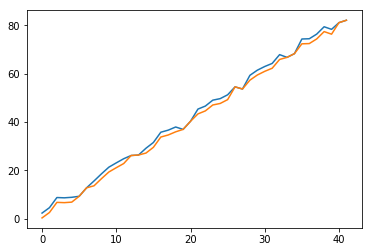

In [60]:
plt.plot(X,Y)
plt.plot(X,Y_noperiod)

### Why does adding the bias here make it predict so much better when having no noise?

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,4.54357083643745,+ve,
sum.periodic_Matern52.lengthscale,1.6550287070912226,+ve,
sum.periodic_Matern52.period,7.019936203227407,+ve,
sum.linear.variances,4.296483103271873,+ve,
Gaussian_noise.variance,1.9646753622471964,+ve,


 /m/home/home2/27/holopaj7/unix/Envs/CS-Major/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


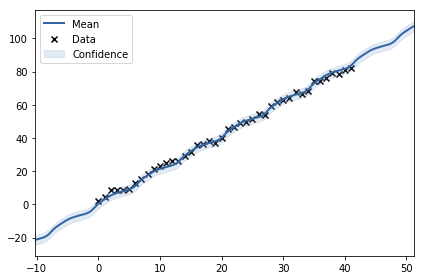

In [61]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y, MATERN+LIN)
m.optimize()
display(m)

m.plot()

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,0.3295831333158074,+ve,
sum.periodic_Matern52.lengthscale,1.1356532732183533,+ve,
sum.periodic_Matern52.period,6.675275288969228,+ve,
sum.linear.variances,4.086231697455617,+ve,
Gaussian_noise.variance,0.9896354589894727,+ve,


 /m/home/home2/27/holopaj7/unix/Envs/CS-Major/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


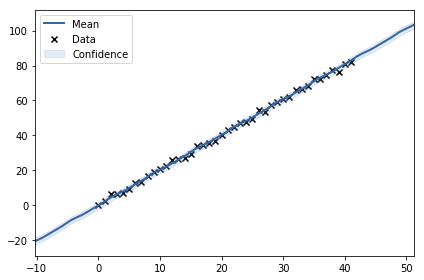

In [62]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y_noperiod, MATERN+LIN)
m.optimize()
display(m)

m.plot()

In [63]:
# larger log likelihood better?

In [64]:
reps=6
data_len=reps*7
X = np.linspace(0, data_len-1, data_len).reshape(-1, 1)

In [65]:
max_p=2
min_p=0
period = np.array([max_p]*5+[min_p]*2)
p_arr=np.tile(period,reps)

 /m/home/home2/27/holopaj7/unix/Envs/CS-Major/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


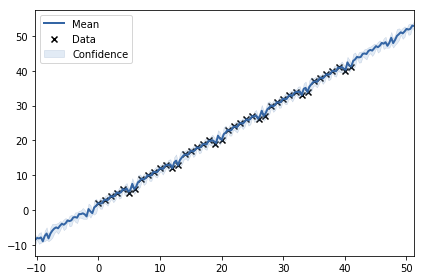

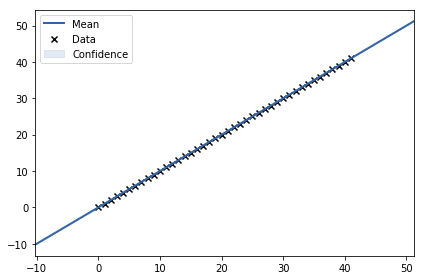

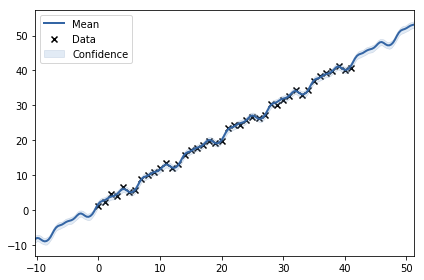

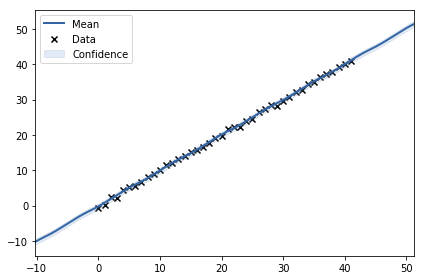

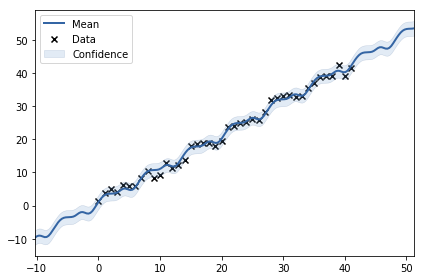

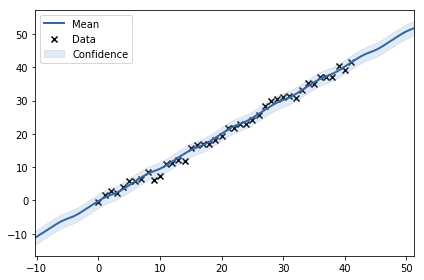

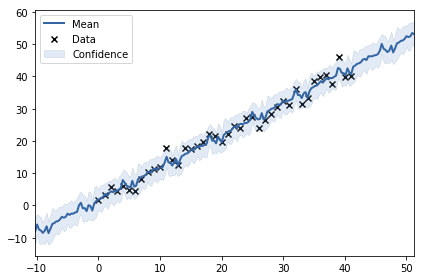

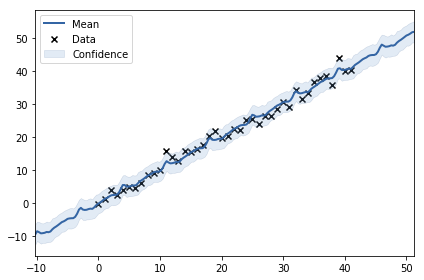

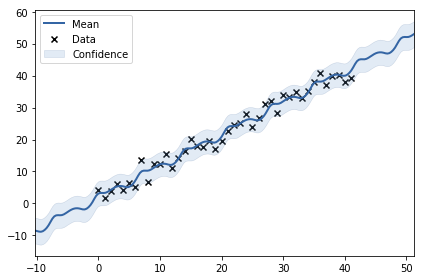

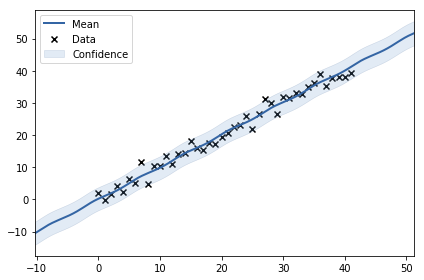

In [66]:
df=pd.DataFrame(columns=['pv','pl','pp','lv','bv','gn','ll','Contains period'],index=range(50))
i=0
rows_list=[]
for lin_a in range(1,2):
    for noise_v in np.linspace(0,2,5):
        PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
        MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
        BIAS = GPy.kern.Bias(input_dim=1, variance=2)
        LIN=GPy.kern.Linear(1)
        #print(noise_v)
        lin=np.linspace(0,lin_a*len(Y)-1,data_len)
        noise = np.random.normal(0,noise_v,data_len)
        Yp=p_arr+lin+noise
        Ylin=lin+noise
        Yp=Yp.reshape(-1,1)
        Ylin=Ylin.reshape(-1,1)
        mp = GPy.models.GPRegression(X, Yp, MATERN+LIN+BIAS)
        mp.optimize()
        mp.plot()
        df.loc[i][:'gn']=mp.param_array
        df.loc[i]['ll']=mp.log_likelihood()
        df.loc[i]['Contains period']=True
        i+=1
        
        PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
        MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
        BIAS = GPy.kern.Bias(input_dim=1, variance=2)
        LIN=GPy.kern.Linear(1)
        
        ml = GPy.models.GPRegression(X, Ylin, MATERN+LIN+BIAS)
        ml.optimize()
        ml.plot()
        df.loc[i][:'gn']=ml.param_array
        df.loc[i]['ll']=ml.log_likelihood()
        df.loc[i]['Contains period']=False
        i+=1
        
        

In [67]:
df=df.dropna()
df

,pv,pl,pp,lv,bv,gn,ll,Contains period
0,5.36625,0.0277202,7,0.995294,2.08888,2.02202e-10,258.36,True
1,1.69477e-16,66.8006,6.05435,0.999995,6.76696e-25,5.56268e-309,333.49,False
2,2.381,1.04023,6.97109,1.01214,1.55116,0.155405,-38.7977,True
3,0.115327,2.54861,7.56611,1.00939,0.0226381,0.145697,-26.8696,False
4,3.98141,1.39062,6.92641,1.05246,0.698829,0.957437,-69.9887,True
5,0.490217,2.0235,6.99793,1.03551,0.229269,0.996571,-66.2433,False
6,5.71846,0.132267,6.99313,0.99763,3.25271,1.98931,-86.516,True
7,1.48341,0.350013,6.99046,1.02192,1.2835e-06,1.98365,-82.3625,False
8,3.43793,1.10622,7.03683,0.98351,3.65038,3.34569,-93.7106,True
9,8.38287,5.59176,7.23452,1.01149,9.28821e-12,3.26725,-89.3441,False


In [68]:
df['pv']=df['pv'].apply(pd.to_numeric)
df['pl']=df['pl'].apply(pd.to_numeric)

Text(0.5,1,'Periodic kernel variables after optimization')

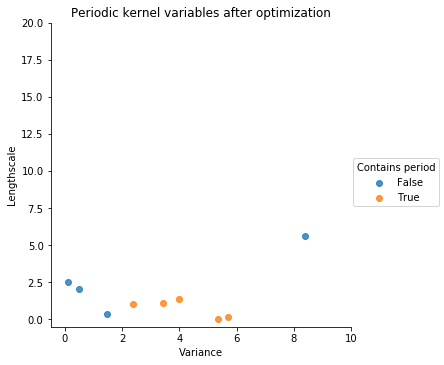

In [69]:
#plotting in log-scale with seaborn was horrible, so this was easiest way to do it
df['pv_log']=np.log(df['pv'])
grid=sns.lmplot(x='pv',y='pl',data=df,fit_reg=False,hue='Contains period')
axes = grid.axes
axes[0,0].set_xlim(-0.5,10)
axes[0,0].set_ylim(-0.5,20)
grid.set_ylabels("Lengthscale")
grid.set_xlabels("Variance")
plt.title("Periodic kernel variables after optimization")
